Muhammad Alpi Ashari
2209106017
A1_22

Mengimport library yang perlukan saja

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Read file csv yang dipakai

In [2]:
df=pd.read_csv('smoking.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


Data sudah bersih

In [3]:
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

Mengecek nilai duplikat dari dataset

In [4]:
df.duplicated().sum()

0

Melakukan one hot encode pada kolom yang akan menjadi target

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categories = ["age", "Cholesterol"]
df_categorical = encoder.fit_transform(df[categories])
categorical = encoder.get_feature_names_out(categories)
df_categorical = pd.DataFrame(df_categorical, columns=categorical)

df_categorical.head()

,age_20,age_25,age_30,age_35,age_40,age_45,age_50,age_55,age_60,age_65,...,Cholesterol_380.0,Cholesterol_386.0,Cholesterol_393.0,Cholesterol_395.0,Cholesterol_406.0,Cholesterol_410.0,Cholesterol_419.0,Cholesterol_441.0,Cholesterol_442.0,Cholesterol_445.0
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Menyatukan pada dataset

In [6]:
df = pd.concat([df, df_categorical], axis=1)
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Cholesterol_380.0,Cholesterol_386.0,Cholesterol_393.0,Cholesterol_395.0,Cholesterol_406.0,Cholesterol_410.0,Cholesterol_419.0,Cholesterol_441.0,Cholesterol_442.0,Cholesterol_445.0
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Menjadikan fitur X dan Y sebagai targetnya

In [7]:
X = df['age_20'] 
y = df['Cholesterol_380.0']

Menyeplit data untuk di latih dan di test dengan size 20%

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membuat model dnn nya menggunakan sequential model dengan beberapa layer serta model compilenya menggunakan optimizer adam loss nya binary dan metrics accuracy

In [9]:
model = Sequential([
    layers.Dense(128, activation='relu', input_shape=[1]),
    layers.Dense(50, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Melakukan pelatihan pada model dengan model fit

In [10]:
hist=model.fit(X_train,y_train, epochs=100 ,validation_split =0.2,batch_size=32)

Epoch 1/100
1114/1114 [==============================] - 9s 4ms/step - loss: 0.0309 - accuracy: 0.9999 - val_loss: 3.3049e-05 - val_accuracy: 1.0000
Epoch 2/100
1114/1114 [==============================] - 4s 4ms/step - loss: 6.4295e-04 - accuracy: 0.9999 - val_loss: 2.3596e-05 - val_accuracy: 1.0000
Epoch 3/100
1114/1114 [==============================] - 4s 4ms/step - loss: 6.6626e-04 - accuracy: 0.9999 - val_loss: 2.1593e-05 - val_accuracy: 1.0000
Epoch 4/100
1114/1114 [==============================] - 4s 4ms/step - loss: 6.8189e-04 - accuracy: 0.9999 - val_loss: 1.8905e-05 - val_accuracy: 1.0000
Epoch 5/100
1114/1114 [==============================] - 4s 4ms/step - loss: 7.2545e-04 - accuracy: 0.9999 - val_loss: 2.4811e-05 - val_accuracy: 1.0000
Epoch 6/100
1114/1114 [==============================] - 4s 4ms/step - loss: 7.3673e-04 - accuracy: 0.9999 - val_loss: 1.7096e-05 - val_accuracy: 1.0000
Epoch 7/100
1114/1114 [==============================] - 4s 4ms/step - loss: 6.5832e-0

Lakukan evaluasi model prediksi berdasarkan hasil

In [11]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=-1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Akurasi:", accuracy)

349/349 [==============================] - 4s 2ms/step
Akurasi: 1.0


Hasilnya yaitu 1.0 atau 1% hasil yang cukup dari akurasi model tersebut

Menampilkan plot berdasarkan dua model yaitu model accuracy dan model loss

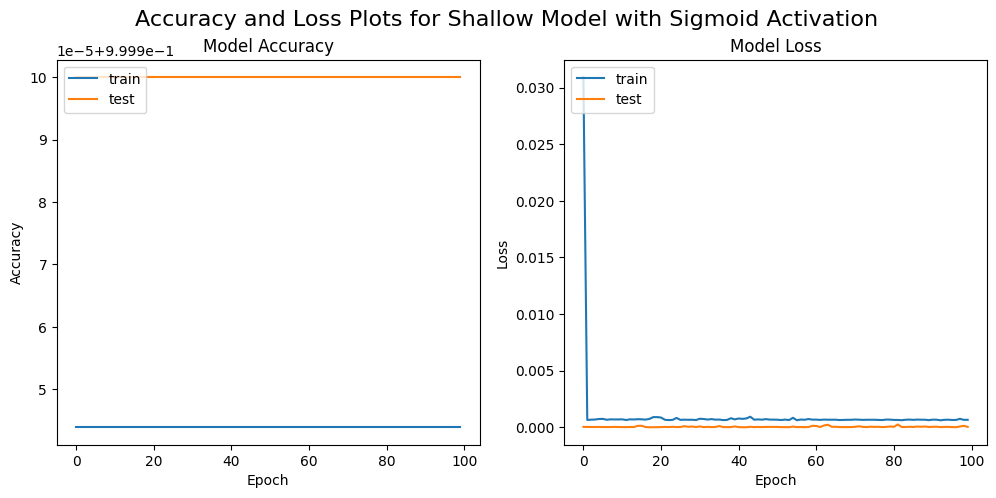

In [12]:
import matplotlib.pyplot as plt
def plot_acc_loss(history, model_name):
    # Plot the accuracy and loss graphs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')

    fig.suptitle(f"Accuracy and Loss Plots for {model_name}", fontsize=16)
    plt.show()

plot_acc_loss(hist, "Shallow Model with Sigmoid Activation")